In [1]:
#import programs
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
from numpy import random
from shapely.geometry import Point
%matplotlib inline

In [2]:
# to import the raw data into pandas
SFOEMS = pd.read_csv('EMS_SFO_Data_120519.csv', header=0)
SFOEMS.head()


,Address,IncidentDate,Incident day,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,Difference between arrival time,...,EMSUnits,EMSPersonnel,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict
0,5th St/jessie Street,1/1/2016,Friday,1/1/2016,3:05:56,1/1/2016,3:12:09,1/1/2016,3:13:08,373,...,0,0,0,0,600,Good Intent,"good intent call, other",n none,6.0,South of Market
1,Stockton St/sutter Street,1/1/2016,Friday,1/1/2016,8:20:46,1/1/2016,8:24:57,1/1/2016,8:25:17,251,...,0,0,0,0,710,False Alarm,"malicious, mischievous false call, other",n none,3.0,Financial District/South Beach
2,277 Golden Gate Avenue,1/1/2016,Friday,1/1/2016,4:43:25,1/1/2016,4:48:45,1/1/2016,5:10:07,320,...,0,0,0,0,743,False Alarm,"smoke detector activation, no fire - unintenti...",n none,6.0,Tenderloin
3,Minna St/4th Street,1/1/2016,Friday,1/1/2016,17:55:50,1/1/2016,18:03:16,1/1/2016,18:05:59,446,...,0,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market
4,Golden Gate Av/6th Street,1/1/2016,Friday,1/1/2016,5:35:47,1/1/2016,5:41:10,1/1/2016,5:42:21,323,...,0,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market


In [3]:
SFOEMS.dtypes

Address                             object
IncidentDate                        object
Incident day                        object
AlarmDt                             object
AlarmTm                             object
ArrivalDt                           object
ArrivalTm                           object
CloseDt                             object
CloseTm                             object
Difference between arrival time      int64
Zipcode                              int64
Battalion                           object
StationArea                        float64
SuppressionUnits                     int64
SuppressionPersonnel                 int64
EMSUnits                             int64
EMSPersonnel                         int64
OtherUnits                           int64
OtherPersonnel                       int64
Primary                              int64
Category                            object
PrimarySituation                    object
MutualAid                           object
SupervisorD

In [4]:
#To create a dictionary of Time_categories for Difference b/w arrival time and alarm time
#Note: per class notes from Lecture 10 - the buckets do NOT include the lower bound, but DO include upper bound, which is what we want
bucket = [-.1, 0, 300, 600, 30000]
Time_cut=pd.cut(SFOEMS['Difference between arrival time'], bucket)
Time_cut.value_counts()

(0.0, 300.0]        37118
(300.0, 600.0]      21701
(600.0, 30000.0]     3082
(-0.1, 0.0]          1447
Name: Difference between arrival time, dtype: int64

In [7]:
#np.histogram('Difference between arrival time', bucket)

In [24]:
import matplotlib as mpl
mpl.rcParams['patch.facecolor'] = 'r'

Text(0, 0.5, 'Frequency')

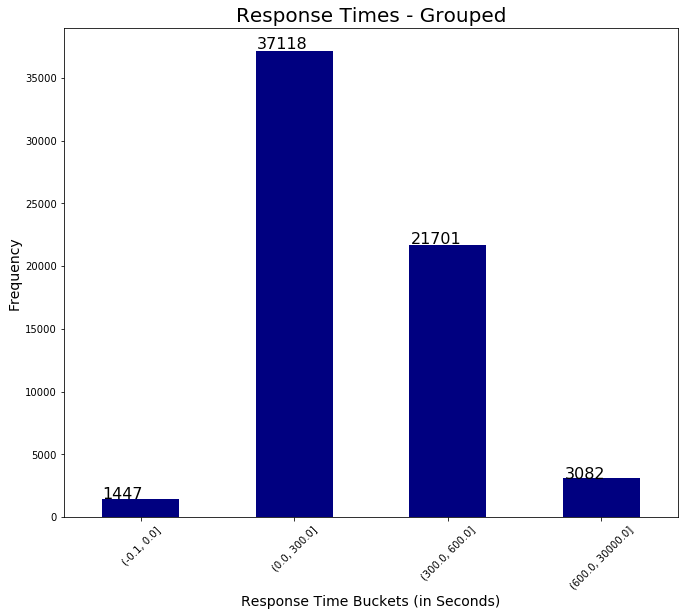

In [42]:
#to plot number of calls by response time bins - NEED TO GET CODE FIXED FOR COUNTS OR DITCH!!!


x_labels = ['1447', '37118', '21701', '3082']
ax = Time_cut.value_counts().sort_index().plot(kind='bar', grid=False, rot=45, color='navy', figsize=(11,9))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), fontsize=16)

ax.set_title('Response Times - Grouped', fontsize=20)
ax.set_xlabel('Response Time Buckets (in Seconds)', fontsize=14)
ax.set_ylabel('Frequency', fontsize=14)


In [1]:

def autolabel(rects, ax):
    (y_bottom, y_top) = ax.get_ylim()
    y_height = y_top - y_bottom
    
    for reet in rects:
            height = rect.get_height()
            
            p_height = (height / y_height)
            
            if p_height > 0.95:
                label_position = height - (y_height * 0.05)
            else:
                label_position = height + (y_height * 0.01)
                
            ax.text(rect.get_x() + rect.get_width()/2., label_position,
                   '%d' % int(height),
                   ha='center', va='bottom')
autolabel(rects, ax)

NameError: name 'rects' is not defined

In [80]:
# extract month from Indcident Date column and add month column
SFOEMS['month'] = pd.DatetimeIndex(SFOEMS['IncidentDate']).month
SFOEMS.head()

,Address,IncidentDate,Incident day,AlarmDt,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,Difference between arrival time,...,EMSPersonnel,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month
0,5th St/jessie Street,1/1/2016,Friday,1/1/2016,3:05:56,1/1/2016,3:12:09,1/1/2016,3:13:08,373,...,0,0,0,600,Good Intent,"good intent call, other",n none,6.0,South of Market,1
1,Stockton St/sutter Street,1/1/2016,Friday,1/1/2016,8:20:46,1/1/2016,8:24:57,1/1/2016,8:25:17,251,...,0,0,0,710,False Alarm,"malicious, mischievous false call, other",n none,3.0,Financial District/South Beach,1
2,277 Golden Gate Avenue,1/1/2016,Friday,1/1/2016,4:43:25,1/1/2016,4:48:45,1/1/2016,5:10:07,320,...,0,0,0,743,False Alarm,"smoke detector activation, no fire - unintenti...",n none,6.0,Tenderloin,1
3,Minna St/4th Street,1/1/2016,Friday,1/1/2016,17:55:50,1/1/2016,18:03:16,1/1/2016,18:05:59,446,...,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,1
4,Golden Gate Av/6th Street,1/1/2016,Friday,1/1/2016,5:35:47,1/1/2016,5:41:10,1/1/2016,5:42:21,323,...,0,0,0,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,1


In [5]:
#To create a dictionary of month number to month name
month_name = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8:
          'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
print(month_name)

{1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}


In [6]:
#To add month_name column to df using append
SFOEMS['Month Name']=SFOEMS['month'].map(month_name)
SFOEMS.tail()

,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,OtherUnits,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month,Month Name
63524,0 Taraval Street,12/31/2017,Sunday,12/31/2017,Sunday,11:12:06,12/31/2017,11:12:06,12/31/2017,11:37:30,...,0,0,324,EMS,motor vehicle accident with no injuries.,n none,7.0,West of Twin Peaks,12,Dec
63525,701 Taylor Street,12/31/2017,Sunday,12/31/2017,Sunday,23:27:39,12/31/2017,23:31:23,12/31/2017,23:42:24,...,0,0,700,False Alarm,"false alarm or false call, other",n none,3.0,Nob Hill,12,Dec
63526,0 Larkin Street,12/31/2017,Sunday,12/31/2017,Sunday,23:40:43,12/31/2017,23:44:17,1/1/2018,0:54:44,...,0,0,322,EMS,motor vehicle accident with injuries,n none,3.0,Russian Hill,12,Dec
63527,0 Sawyer Street,12/31/2017,Sunday,12/31/2017,Sunday,17:37:54,12/31/2017,17:39:31,12/31/2017,18:28:38,...,0,0,300,EMS,"rescue, ems incident, other",n none,10.0,Visitacion Valley,12,Dec
63528,150 Loehr Street,12/31/2017,Sunday,12/31/2017,Sunday,12:30:40,12/31/2017,12:35:01,12/31/2017,12:42:06,...,0,0,651,Good Intent,"smoke scare, odor of smoke",n none,10.0,Visitacion Valley,12,Dec


In [7]:
#To create a dictionary of month to seasons
season = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8:
          'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}
print(season)

{1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'}


In [8]:
#To add season column to df using append
SFOEMS['Season']=SFOEMS['month'].map(season)
SFOEMS.tail()

,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,OtherPersonnel,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month,Month Name,Season
63524,0 Taraval Street,12/31/2017,Sunday,12/31/2017,Sunday,11:12:06,12/31/2017,11:12:06,12/31/2017,11:37:30,...,0,324,EMS,motor vehicle accident with no injuries.,n none,7.0,West of Twin Peaks,12,Dec,Winter
63525,701 Taylor Street,12/31/2017,Sunday,12/31/2017,Sunday,23:27:39,12/31/2017,23:31:23,12/31/2017,23:42:24,...,0,700,False Alarm,"false alarm or false call, other",n none,3.0,Nob Hill,12,Dec,Winter
63526,0 Larkin Street,12/31/2017,Sunday,12/31/2017,Sunday,23:40:43,12/31/2017,23:44:17,1/1/2018,0:54:44,...,0,322,EMS,motor vehicle accident with injuries,n none,3.0,Russian Hill,12,Dec,Winter
63527,0 Sawyer Street,12/31/2017,Sunday,12/31/2017,Sunday,17:37:54,12/31/2017,17:39:31,12/31/2017,18:28:38,...,0,300,EMS,"rescue, ems incident, other",n none,10.0,Visitacion Valley,12,Dec,Winter
63528,150 Loehr Street,12/31/2017,Sunday,12/31/2017,Sunday,12:30:40,12/31/2017,12:35:01,12/31/2017,12:42:06,...,0,651,Good Intent,"smoke scare, odor of smoke",n none,10.0,Visitacion Valley,12,Dec,Winter


(4000, 6000)

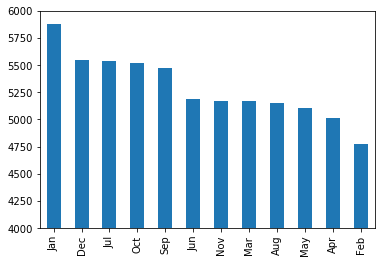

In [9]:
#to calculate calls by month
month_calls=SFOEMS['Month Name'].value_counts().plot(kind='bar', grid=False)
plt.ylim(4000,6000)

In [10]:
#To create a dictionary of weekday vs. weekend
weekday_vs_weekend = {'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday', 'Saturday': 'Weekend', 'Sunday': 'Weekend'}
print(weekday_vs_weekend)

{'Monday': 'Weekday', 'Tuesday': 'Weekday', 'Wednesday': 'Weekday', 'Thursday': 'Weekday', 'Friday': 'Weekday', 'Saturday': 'Weekend', 'Sunday': 'Weekend'}


In [12]:
#To add day type column to df using append
SFOEMS['Day Type']=SFOEMS['Incident day'].map(weekday_vs_weekend)
SFOEMS.head(25)

,Address,IncidentDate,Incident day,AlarmDt,Alarm day,AlarmTm,ArrivalDt,ArrivalTm,CloseDt,CloseTm,...,Primary,Category,PrimarySituation,MutualAid,SupervisorDistrict,NeighborhoodDistrict,month,Month Name,Season,Day Type
0,5th St/jessie Street,1/1/2016,Friday,1/1/2016,Friday,3:05:56,1/1/2016,3:12:09,1/1/2016,3:13:08,...,600,Good Intent,"good intent call, other",n none,6.0,South of Market,1,Jan,Winter,Weekday
1,Stockton St/sutter Street,1/1/2016,Friday,1/1/2016,Friday,8:20:46,1/1/2016,8:24:57,1/1/2016,8:25:17,...,710,False Alarm,"malicious, mischievous false call, other",n none,3.0,Financial District/South Beach,1,Jan,Winter,Weekday
2,277 Golden Gate Avenue,1/1/2016,Friday,1/1/2016,Friday,4:43:25,1/1/2016,4:48:45,1/1/2016,5:10:07,...,743,False Alarm,"smoke detector activation, no fire - unintenti...",n none,6.0,Tenderloin,1,Jan,Winter,Weekday
3,Minna St/4th Street,1/1/2016,Friday,1/1/2016,Friday,17:55:50,1/1/2016,18:03:16,1/1/2016,18:05:59,...,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,1,Jan,Winter,Weekday
4,Golden Gate Av/6th Street,1/1/2016,Friday,1/1/2016,Friday,5:35:47,1/1/2016,5:41:10,1/1/2016,5:42:21,...,151,Fire,"outside rubbish, trash or waste fire",n none,6.0,South of Market,1,Jan,Winter,Weekday
5,238 Eddy St 336,1/1/2016,Friday,1/1/2016,Friday,9:40:04,1/1/2016,9:49:09,1/1/2016,10:17:56,...,500,Service,"service call, other",n none,6.0,Tenderloin,1,Jan,Winter,Weekday
6,149 Mason St 708,1/1/2016,Friday,1/1/2016,Friday,15:20:52,1/1/2016,15:28:49,1/1/2016,16:27:12,...,500,Service,"service call, other",n none,6.0,Tenderloin,1,Jan,Winter,Weekday
7,736 Mission Street,1/1/2016,Friday,1/1/2016,Friday,16:31:46,1/1/2016,16:35:44,1/1/2016,16:51:24,...,700,False Alarm,"false alarm or false call, other",n none,6.0,Financial District/South Beach,1,Jan,Winter,Weekday
8,680 Mission Street,1/1/2016,Friday,1/1/2016,Friday,17:50:58,1/1/2016,17:56:03,1/1/2016,18:03:29,...,700,False Alarm,"false alarm or false call, other",n none,6.0,Financial District/South Beach,1,Jan,Winter,Weekday
9,171 2nd Street,1/1/2016,Friday,1/1/2016,Friday,0:35:02,1/1/2016,0:40:17,1/1/2016,0:53:24,...,710,False Alarm,"malicious, mischievous false call, other",n none,6.0,Financial District/South Beach,1,Jan,Winter,Weekday


(15000, 16500)

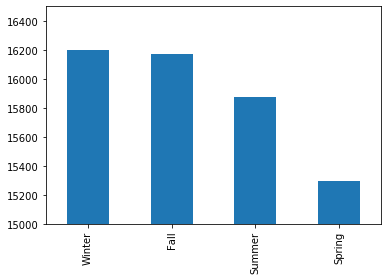

In [13]:
#to calculate calls by season
month_calls=SFOEMS['Season'].value_counts().plot(kind='bar', grid=False)
plt.ylim(15000,16500)

(8000, 10000)

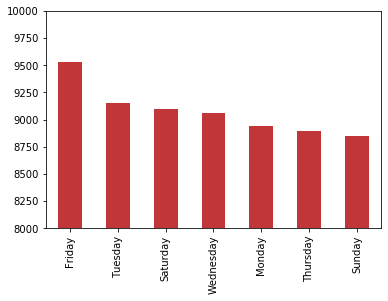

In [14]:
#to calculate calls by day of week
sns.set_palette('RdBu')
month_calls=SFOEMS['Incident day'].value_counts().plot(kind='bar', grid=False)
plt.ylim(8000,10000)

(8000, 10000)

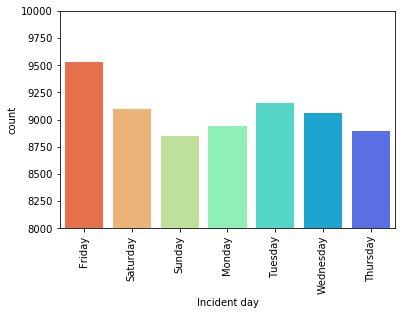

In [15]:
#to calculate number of calls by day - for staffing purposes
month_calls=sns.countplot(x='Incident day', data=SFOEMS, palette='rainbow_r')
plt.xticks(rotation=90)
plt.ylim(8000,10000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

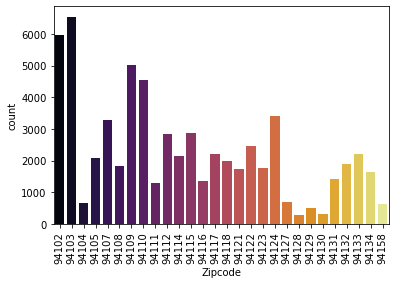

In [19]:
#to calculate number of calls by zip code - for staffing purposes
month_calls=sns.countplot(x='Zipcode', data=SFOEMS, palette='inferno')
plt.xticks(rotation=90)
#plt.ylim(8000,10000)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

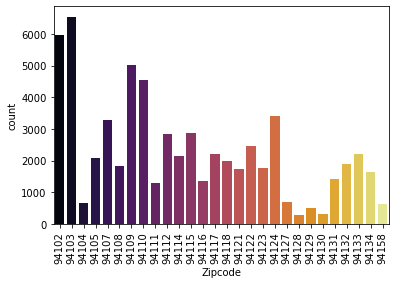

In [20]:
#to calculate number of calls by zip code - for staffing purposes
month_calls=sns.countplot(x='Zipcode', data=SFOEMS, palette='inferno')
plt.xticks(rotation=90)
#plt.ylim(8000,10000)

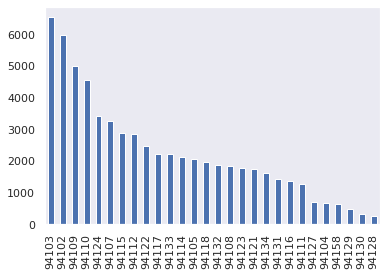

In [21]:
#to calculate calls by zip code
sns.set(color_codes=True)
month_calls=SFOEMS['Zipcode'].value_counts().plot(kind='bar', grid=False)
#plt.ylim(8000,10000)

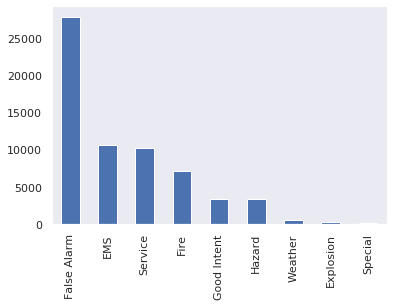

In [22]:
#to take the top 4 zip codes from above chart

sns.set(color_codes=True)
month_calls=SFOEMS['Category'].value_counts().plot(kind='bar', grid=False)
#plt.ylim(8000,10000)

In [23]:
# create a seperate dataframe for top 4 zipcodes - zip1: 94103
top_zip1= SFOEMS.loc[SFOEMS['Zipcode'] == 94103]
top_zip1.shape

(6536, 30)

In [24]:
# create a seperate dataframe for top 4 zipcodes - zip2: 94102
top_zip2= SFOEMS.loc[SFOEMS['Zipcode'] == 94102]
top_zip2.shape

(5962, 30)

In [25]:
# create a seperate dataframe for top 4 zipcodes - zip3: 94109
top_zip3= SFOEMS.loc[SFOEMS['Zipcode'] == 94109]
top_zip3.shape

(5002, 30)

In [26]:
# create a seperate dataframe for top 4 zipcodes - zip4: 94110
top_zip4= SFOEMS.loc[SFOEMS['Zipcode'] == 94110]
top_zip4.shape

(4548, 30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

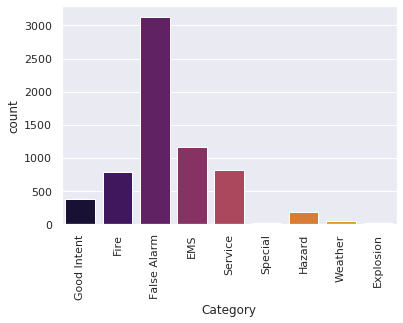

In [27]:
zip1_count=sns.countplot(x='Category', data=top_zip1, palette='inferno')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

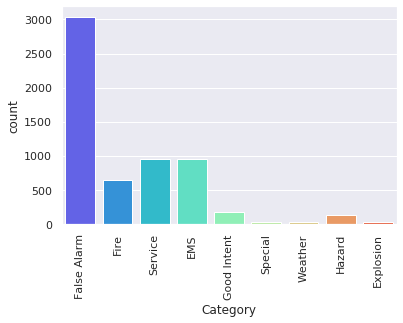

In [28]:
zip2_count=sns.countplot(x='Category', data=top_zip2, palette='rainbow')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

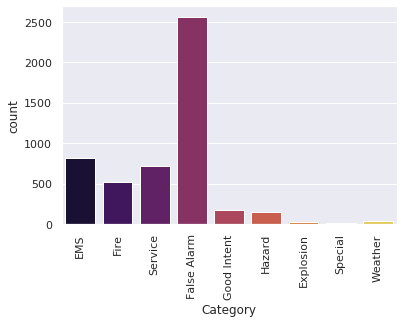

In [29]:
zip3_count=sns.countplot(x='Category', data=top_zip3, palette='inferno')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

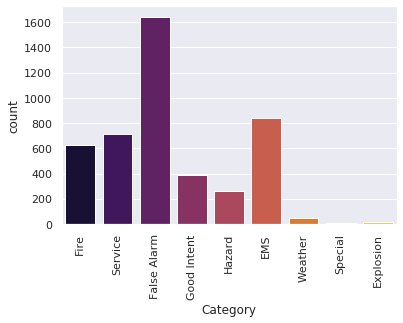

In [30]:
zip4_count=sns.countplot(x='Category', data=top_zip4, palette='inferno')
plt.xticks(rotation=90)